## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
np.isnan(np.min(y))

False

Пропусков нет.

Исходя из описания датасета, он содержит только числовые (numeric) данные. Обработка категориальных значений не требуется.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [3]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
normalizer = StandardScaler()

In [48]:
X_train_norm = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_norm, columns=X_train.columns)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.391044,1.347889,0.307843,0.966622,0.253795,-0.790442,-1.294638,0.465848,-0.306994,0.900397,-1.106113,-1.508440,-0.055919
1,-1.242181,-1.088631,0.428009,1.266875,-1.643928,-0.467388,-0.441548,0.221081,-0.327050,-1.235910,1.488193,0.191051,-0.415656
2,0.094094,-0.010602,1.068891,-0.354493,0.174723,0.824832,1.264633,-0.594812,2.500914,0.221806,0.297364,0.850336,1.248127
3,-1.242181,-0.860755,0.387954,0.816495,-1.169497,0.437166,0.288204,0.465848,-1.049084,-0.942691,-0.127932,0.879638,-1.150118
4,0.180704,0.813257,-0.493260,-0.384518,-0.062492,-0.790442,-1.212413,1.934455,0.615605,2.249203,-1.701527,-1.581694,-0.280754


In [49]:
X_test_norm = normalizer.transform(X_test)
X_test = pd.DataFrame(data=X_test_norm, columns=X_test.columns)
X_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.081333,-1.036044,-2.616183,-0.894949,4.128313,-0.709679,-0.749894,-1.900240,1.879163,-0.963635,1.360604,0.703828,-0.151849
1,-1.563877,-0.571528,-2.095466,-0.084265,-1.011354,0.340250,-0.379879,-0.023687,-0.286937,-1.294553,-0.085402,-0.219171,-1.060184
2,1.207657,-0.650408,-0.493260,-1.135151,2.151518,1.147887,1.192685,-1.084348,1.076904,0.209239,0.552542,1.641479,0.034015
3,-1.563877,-0.790639,-1.654859,0.306065,-1.011354,-0.499693,-0.420992,-0.594812,-0.066316,-1.340631,-0.042873,1.084749,-0.820359
4,1.405624,-0.589056,-0.413149,-1.045075,1.518944,1.470942,1.017956,-0.921169,0.936508,0.515024,-0.085402,1.055447,0.603599


In [50]:
model_1 = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
model_2 = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
model_3 = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
model_4 = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
model_5 = KNeighborsClassifier(n_neighbors = 15, metric='euclidean')
model_6 = KNeighborsClassifier(n_neighbors = 25, metric='euclidean')

In [51]:
model_1.fit(X_train[['alcohol', 'magnesium']], y_train)
model_2.fit(X_train[['alcohol', 'magnesium']], y_train)
model_3.fit(X_train[['alcohol', 'magnesium']], y_train)
model_4.fit(X_train[['alcohol', 'magnesium']], y_train)
model_5.fit(X_train[['alcohol', 'magnesium']], y_train)
model_6.fit(X_train[['alcohol', 'magnesium']], y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

In [11]:
from sklearn.metrics import accuracy_score

In [52]:
print('model_1 train:', accuracy_score(y_train, model_1.predict(X_train[['alcohol', 'magnesium']])))
print('model_1 test:', accuracy_score(y_test, model_1.predict(X_test[['alcohol', 'magnesium']])))
print('model_2 train:', accuracy_score(y_train, model_2.predict(X_train[['alcohol', 'magnesium']])))
print('model_2 test:', accuracy_score(y_test, model_2.predict(X_test[['alcohol', 'magnesium']])))
print('model_3 train:', accuracy_score(y_train, model_3.predict(X_train[['alcohol', 'magnesium']])))
print('model_3 test:', accuracy_score(y_test, model_3.predict(X_test[['alcohol', 'magnesium']])))
print('model_4 train:', accuracy_score(y_train, model_4.predict(X_train[['alcohol', 'magnesium']])))
print('model_4 test:', accuracy_score(y_test, model_4.predict(X_test[['alcohol', 'magnesium']])))
print('model_5 train:', accuracy_score(y_train, model_5.predict(X_train[['alcohol', 'magnesium']])))
print('model_5 test:', accuracy_score(y_test, model_5.predict(X_test[['alcohol', 'magnesium']])))
print('model_6 train:', accuracy_score(y_train, model_6.predict(X_train[['alcohol', 'magnesium']])))
print('model_6 test:', accuracy_score(y_test, model_6.predict(X_test[['alcohol', 'magnesium']])))

model_1 train: 0.9919354838709677
model_1 test: 0.7407407407407407
model_2 train: 0.782258064516129
model_2 test: 0.7222222222222222
model_3 train: 0.7661290322580645
model_3 test: 0.6481481481481481
model_4 train: 0.7258064516129032
model_4 test: 0.6666666666666666
model_5 train: 0.7258064516129032
model_5 test: 0.6666666666666666
model_6 train: 0.717741935483871
model_6 test: 0.7037037037037037


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [18]:
!pip install mlxtend

You should consider upgrading via the 'C:\Users\mozg2\PycharmProjects\Py_Learning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [13]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [14]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

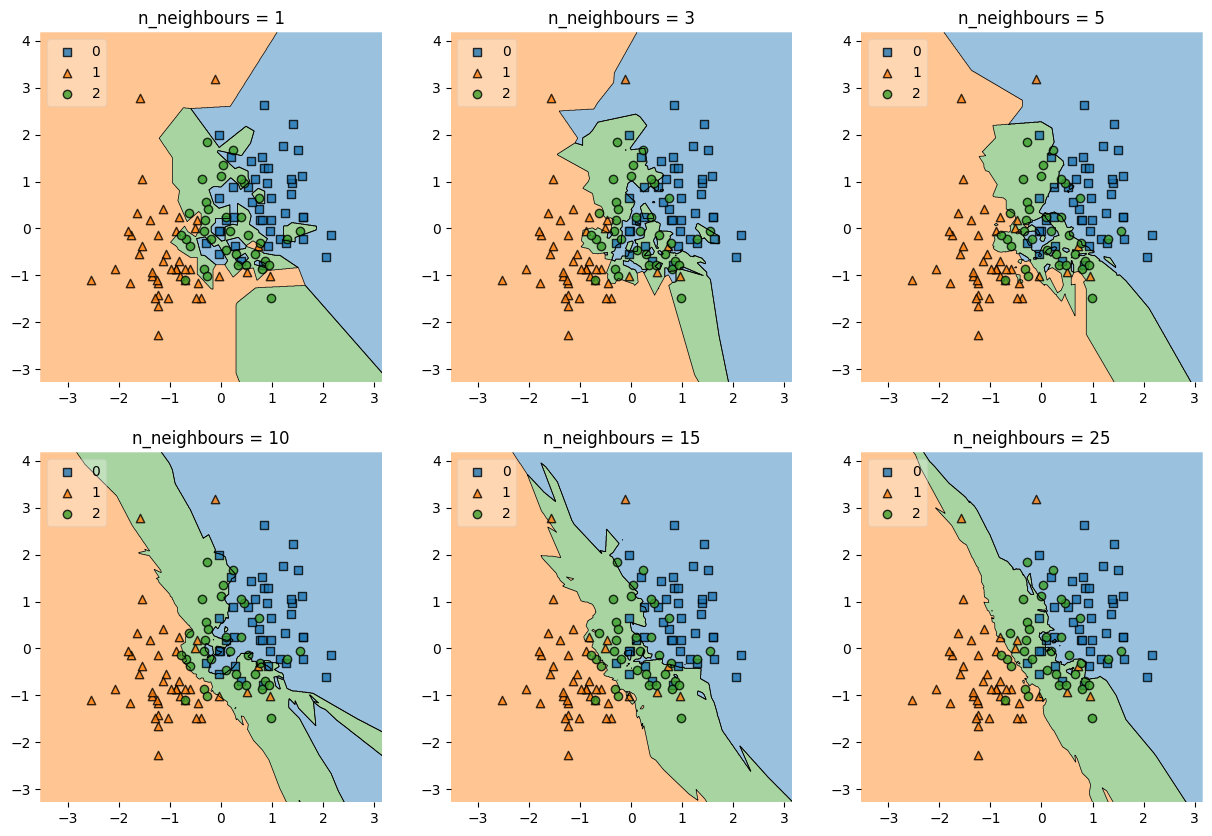

In [53]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip([model_1, model_2, model_3, model_4, model_5, model_6],
                         labels,
                         [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2]]):

    clf.fit(X_train[['alcohol', 'magnesium']].values, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[['alcohol', 'magnesium']].values, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Исходя из данных, полученных в 1.3, оптимальным является n_neighbours=3. В отличие от n_neighbours=1, n_neighbours=3 не переобучает модель, а еще большее увеличение соседей приводит к снижению доли правильных ответов. 1.5 подтверждает это: как мы видим, разные классы перемешанны в центре, поэтому слишком большое или слишком малое число соседей приведет к неправильным ответам.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

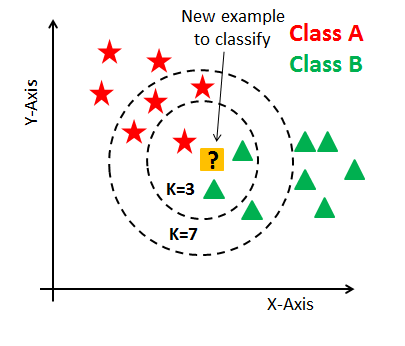

In [16]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y #Запомнили тренировочную выборку
        pass
    
    def predict(self, X):
        prediction = []
        for i in X:
            square = np.square(i - self.X_train)
            sum_square = np.sum(square, axis=1)
            distance = np.sqrt(sum_square) #Посчитали Евклидово расстояние
            distance = distance.reshape(len(distance), 1)
            distance = np.concatenate((distance, self.y_train.reshape(len(self.y_train), 1)), axis=1) #Объединили расстояния с классами объектов
            distance = distance[distance[:, 0].argsort()] #Отсортировали по расстояниям
            values, counts = np.unique(distance[:self.k, 1], return_counts=True) #Отобрали k ближайших
            prediction.append(values[counts.argmax()]) #В качестве предсказания выбрали самый частотный класс
        return(np.array(prediction))  
        pass

In [17]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [18]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [54]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [22]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропусков нет.

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [55]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

Удаленный столбец повторял индексы и не нёс в себе полезной информации.

In [56]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [57]:
corr = data.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [70]:
data = pd.get_dummies(data, drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [267]:
X = data.drop(labels='price', axis=1)
y = data['price']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [269]:
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
23590,1.02,62.6,57.0,6.47,6.41,4.03,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
20122,1.23,61.3,57.0,6.92,6.87,4.23,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
41416,0.53,62.4,59.0,5.18,5.21,3.24,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
19392,1.50,62.9,56.0,7.24,7.33,4.58,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
48949,0.70,61.6,57.0,5.73,5.69,3.52,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,0.30,60.2,57.0,4.36,4.38,2.63,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
50496,0.53,61.0,57.0,5.23,5.26,3.22,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
29199,0.33,61.6,55.0,4.46,4.47,2.75,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
40061,0.53,62.5,60.0,5.18,5.16,3.23,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [270]:
X_train_norm = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_norm, index=X_train.index, columns=X_train.columns)
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
23590,0.476637,0.593828,-0.201072,0.665760,0.609753,0.714144,-0.316858,1.223948,-0.583202,-0.538957,...,-0.425841,-0.332558,-0.233550,5.371054,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
20122,0.922237,-0.319016,-0.201072,1.068266,1.021402,1.002914,-0.316858,1.223948,-0.583202,-0.538957,...,2.348296,-0.332558,-0.233550,5.371054,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
41416,-0.563099,0.453390,0.699227,-0.488091,-0.464115,-0.426497,-0.316858,1.223948,-0.583202,-0.538957,...,2.348296,-0.332558,-0.233550,-0.186183,1.768973,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
19392,1.495153,0.804484,-0.651222,1.354492,1.433051,1.508261,-0.316858,-0.817028,-0.583202,1.855435,...,2.348296,-0.332558,-0.233550,-0.186183,1.768973,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
48949,-0.202374,-0.108359,-0.201072,0.003861,-0.034568,-0.022219,-0.316858,1.223948,-0.583202,-0.538957,...,-0.425841,-0.332558,4.281744,-0.186183,-0.565300,2.204406,-0.420228,-0.543988,-0.271098,-0.321794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,-1.051138,-1.091421,-0.201072,-1.221546,-1.206873,-1.307245,-0.316858,1.223948,-0.583202,-0.538957,...,-0.425841,-0.332558,-0.233550,-0.186183,-0.565300,-0.453637,-0.420228,1.838277,-0.271098,-0.321794
50496,-0.563099,-0.529672,-0.201072,-0.443368,-0.419370,-0.455374,-0.316858,1.223948,-0.583202,-0.538957,...,-0.425841,-0.332558,-0.233550,-0.186183,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,3.107583
29199,-0.987481,-0.108359,-1.101371,-1.132101,-1.126333,-1.133983,-0.316858,1.223948,-0.583202,-0.538957,...,-0.425841,3.006995,-0.233550,5.371054,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
40061,-0.563099,0.523609,1.149376,-0.488091,-0.508859,-0.440936,-0.316858,-0.817028,1.714673,-0.538957,...,2.348296,-0.332558,-0.233550,-0.186183,-0.565300,2.204406,-0.420228,-0.543988,-0.271098,-0.321794


In [271]:
X_test_norm = normalizer.transform(X_test)
X_test = pd.DataFrame(data=X_test_norm, index=X_test.index, columns=X_test.columns)
X_test

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
8018,0.455417,-0.038141,-0.651222,0.638926,0.591855,0.613074,-0.316858,-0.817028,1.714673,-0.538957,...,-0.425841,-0.332558,-0.23355,-0.186183,1.768973,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
1583,-0.202374,-0.950984,0.249077,-0.014028,0.045972,-0.094412,-0.316858,-0.817028,-0.583202,1.855435,...,-0.425841,-0.332558,-0.23355,-0.186183,-0.565300,-0.453637,2.379661,-0.543988,-0.271098,-0.321794
9138,0.710046,-1.372296,0.699227,0.916208,0.976657,0.757459,-0.316858,-0.817028,-0.583202,1.855435,...,2.348296,-0.332558,-0.23355,-0.186183,-0.565300,2.204406,-0.420228,-0.543988,-0.271098,-0.321794
2787,-0.075060,-0.529672,-1.101371,0.146974,0.171257,0.093288,-0.316858,1.223948,-0.583202,-0.538957,...,-0.425841,-0.332558,-0.23355,-0.186183,-0.565300,-0.453637,-0.420228,1.838277,-0.271098,-0.321794
52429,-0.202374,-0.389234,0.699227,-0.067696,-0.034568,-0.094412,-0.316858,-0.817028,1.714673,-0.538957,...,-0.425841,3.006995,-0.23355,-0.186183,-0.565300,-0.453637,-0.420228,-0.543988,3.688709,-0.321794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23150,0.476637,0.523609,0.249077,0.728372,0.591855,0.728582,-0.316858,-0.817028,1.714673,-0.538957,...,-0.425841,-0.332558,-0.23355,5.371054,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
42274,-1.199671,-1.653171,1.599525,-1.534607,-1.511136,-1.653769,-0.316858,-0.817028,-0.583202,1.855435,...,-0.425841,-0.332558,-0.23355,-0.186183,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,3.107583
20805,2.895612,-0.529672,-0.201072,2.392063,2.318992,2.259062,-0.316858,1.223948,-0.583202,-0.538957,...,-0.425841,-0.332558,-0.23355,-0.186183,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
47088,-0.138717,-0.880765,-0.201072,0.102251,0.028074,-0.036658,-0.316858,-0.817028,1.714673,-0.538957,...,2.348296,-0.332558,-0.23355,-0.186183,-0.565300,2.204406,-0.420228,-0.543988,-0.271098,-0.321794


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [272]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [273]:
mean_squared_error(y_test, reg.predict(X_test))

1303126.7488467365

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [274]:
reg.coef_

array([5268.33484547,  -73.1113    ,  -67.58876012, -959.00197931,
         80.66323539, -238.038613  ,  180.15573711,  421.77166368,
        345.46452229,  319.33315674,  -78.91526549, -102.4434438 ,
       -190.84186213, -349.2794899 , -431.94438793, -513.63543671,
        965.63562545, 1586.6809227 , 1032.55110803, 1651.29829184,
       1808.17705006, 1274.4152671 , 1453.37529452])

К-ф для 'carat' в разы превышает все остальные к-ф. Также высокие к-ф наблюдаются для 'x' и закодированных категориальных признаков (в особенности для 'clarity').

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [38]:
from sklearn import linear_model

In [275]:
clf = linear_model.Lasso(alpha=10)

In [276]:
clf.fit(X_train, y_train)

Lasso(alpha=10)

In [277]:
clf.coef_

array([4789.30137987,  -86.41865745,  -76.38421182, -488.89810043,
         -0.        , -194.2826301 ,   55.05784634,  216.7908221 ,
        157.06549182,  149.17562219,   -7.88408268,  -36.14771625,
       -112.15611528, -275.57278891, -360.5437015 , -453.05734012,
        633.62380499,  816.23591491,  363.21039056, 1001.18737862,
       1053.31657786,  815.19649858,  924.7002073 ])

Как видим многие к-ф сильно урезались, а некоторые даже занулились. Это говорит о том, что проблема мультиколлинеарности действительно присутствует.

In [278]:
clf = linear_model.Ridge(alpha=10)

In [279]:
clf.fit(X_train, y_train)

Ridge(alpha=10)

In [280]:
clf.coef_

array([5231.92426006,  -70.7371685 ,  -67.72709063, -906.60960685,
         71.89519322, -247.34787425,  180.79164772,  423.06171787,
        346.3485106 ,  320.82710688,  -78.50366593, -102.26567173,
       -190.28223374, -348.3996112 , -430.67854033, -512.29537443,
        952.55440194, 1554.9217241 , 1005.41863132, 1624.81112902,
       1777.23348705, 1256.09575412, 1432.02576579])

Здесь мы наблюдаем похожую картину, однако урезание к-ф не такое радикальное.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [281]:
weight_norm_Lasso = []
weight_norm_Ridge = []
alpha = [0.1, 1, 10, 100, 200]

for i in alpha:
    clf = linear_model.Ridge(alpha=i)
    clf.fit(X_train, y_train)
    weight_norm_Ridge.append(np.linalg.norm(clf.coef_))
    clf = linear_model.Lasso(alpha=i)
    clf.fit(X_train, y_train)
    weight_norm_Lasso.append(np.linalg.norm(clf.coef_))

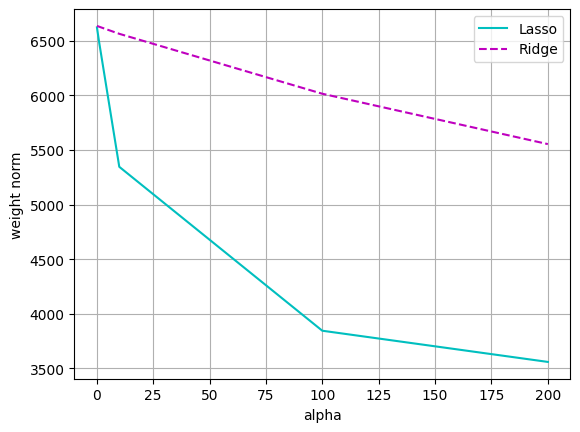

In [282]:
plt.plot(alpha, weight_norm_Lasso, 'c-', label='Lasso')
plt.plot(alpha, weight_norm_Ridge, 'm--', label='Ridge')
plt.xlabel('alpha')
plt.ylabel('weight norm')
plt.legend()
plt.grid()
plt.show()

Lasso-регрессия радикальнее уменьшает веса (а некоторые, как мы видели выше, даже зануляет). Именно поэтому её используют для отбора признаков.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [283]:
reg = linear_model.LassoCV(alphas=alpha, max_iter=10000, cv=5)

In [284]:
reg.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, max_iter=10000)

In [285]:
for i in range(len(reg.alphas_)):
    print('for alpha', reg.alphas_[i], 'score is', reg.mse_path_[i].mean())

for alpha 200.0 score is 2132184.241663244
for alpha 100.0 score is 1765762.9464296724
for alpha 10.0 score is 1333979.674556702
for alpha 1.0 score is 1272930.64333616
for alpha 0.1 score is 1272776.4850180247


Как видим, наиболее качественными являются 0.1 и 1 (различие между ними минимально). Однако мы выберем 1, т.к. при более низких cv, он показывает немного лучшее качество.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [286]:
clf = linear_model.Lasso(alpha=1)

In [287]:
clf.fit(X_train, y_train)

Lasso(alpha=1)

In [288]:
clf.coef_

array([5226.7681465 ,  -79.69844482,  -68.75169954, -883.16853153,
          0.        , -196.39721011,  168.81027536,  402.85641457,
        327.27274842,  304.10485076,  -71.70629412,  -95.71125007,
       -182.9083722 , -341.9316734 , -424.83196941, -507.63130228,
        932.24243199, 1509.40228808,  965.33695273, 1586.15080177,
       1732.38451231, 1228.18647187, 1400.2493907 ])

Наиболее информативным оказался признак 'carat'. Это объясняется его высокой корреляцией с 'price' (ну и логикой: больше карат - дороже). Lasso-регрессия снизила к-ф 'x', 'y', 'z', т.к. они сильно коррелируют между собой и с признаком 'carat'. Признаки 'depth' и 'table' изначально имеют низкую корреляцию с 'price', а потому неинформативны. Также высокие к-ф имеет признак 'clarity' (хотя Lasso-регрессия немного порезала его к-ф), что логично, ведь чистота влияет на цену.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [289]:
mean_squared_error(y_test, clf.predict(X_test))

1300671.0858608403

Lasso-регрессия показала немного лучший результат, нежели линейная регрессия. Это обусловлено наличием мультиколлинеарности (признаков коррелирующих между собой). В случаях мультиколлинеарности использование Lasso-регрессии (или Ridge-регрессии) является предпочтительным.